<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 2: Mathematics in Python

*Developed by Johannes Haas and Raoul Collenteur, 2020*

In this lecture we will explore the possibilities of Python to perform mathematical calculations. We will learn how to work with Numpy, the numerical mathematics package, and compute analytical solutions using Python. To understand the results better, we will often visualize the results and check if they agree with our expectations. We will not only look at 1-dimensional data, but also consider 2-dimensional data (common in geosciences) and learn how to plot this type of data.

**Some tips/reminders for working in a notebook:**

- shift-enter to run a code-block
- shift-tab to get quick information on a function
- tab after a dot (`.`) to find methods

## Lecture Content

1. [Recap Basic mathematical operators](#Basic-mathematical-operators)
2. [1D Numpy arrays](#1D-Numpy-arrays)
3. [Numpy mathematical operators](#Mathematical-operators-in-Numpy)
4. [2D Numpy Arrays](#2D-Numpy-Arrays)
5. [Slicing and indexing arrays](#Slicing-and-Indexing)
6. [Additional Readings](#Additional-Readings)
7. [Answers to Exercises](#Answers-to-exercises)

### Importing packages
In the previous lecture we learned how to import Python packages. It is common to put all imports in the first code block of a Jupyter Notebook. This makes it easier to track which packages are used in the Notebooks.

In [178]:
# Import packages here
import numpy as np
import matplotlib.pyplot as plt

# Basic mathematical operators
Pure Python, Python without importing any packages, provides a few common mathematical operators. In the previous lecture, the following operators were introduced:

- addition: `+`
- subtraction: `-`
- division: `/`
- multiplication: `*`
- power: `**`

For some phenomena $y$ that is caused by $x$, let's say we can calculate y from x using the following formula: 

$$y = \frac{x}{-2} + x^2$$

Now, let's say we want to calculate the `y` for `x=2`. We could use the following Python code to do this:

In [179]:
x = 2
y = x/-2 + x ** 2
print(y)

3.0


That seems about correct. However, often we are interested to calculate `y` for a whole range of `x`'s. A rather intuitive approach when learning Python is to define a Python `list` with different values for `x`, and apply the formula above.

(spoiler: this won't work, but why not?)

In [180]:
x = [0, 1, 2, 3, 4, 5]  # type(x): list
y = (x / -2) + x ** 2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

# 1D Numpy arrays
In the example above we tried to apply mathematical operators to perform calculations on a `list` and got an error message. This is because `list` is not meant for numerical calculations. For this purpose, we need to use Numpy Arrays. To create a Numpy Array from a Python list we can use the `np.array` function.

### Numpy Array from List

In [181]:
x = [0, 1, 2, 3, 4, 5]  # This is a Python list
x = np.array(x)

In [182]:
# What is the type of the variable xa?
print(type(x))

<class 'numpy.ndarray'>


We can now use common mathematical operators to perform numerical calculations on a Numpy Array to obtain the value of y for a whole range of `x`'s. 

In [183]:
y = x/-2 + x ** 2
print(y)

[ 0.   0.5  3.   7.5 14.  22.5]


Or better, we make a plot of x versus y:

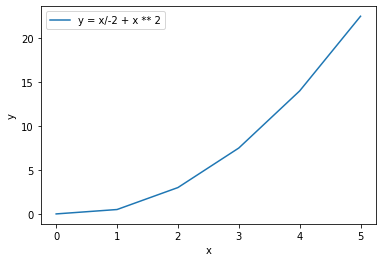

In [184]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["y = x/-2 + x ** 2"])  # Note the brackets around the string!

## Creating numpy arrays
In the previous example, we transformed a lst to a Numpy Array. Fortunately, Numpy contains a number of functions that make it easy for us to create arrays. The following methods are particularly helpfull to memorize:

- np.ones
- np.zeros
- np.full
- np.arange
- np.linspace

### np.ones and np.zeros
The first and the second method are pretty straightforward, as shown by the two examples below:

In [185]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [186]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

The first code block creates a 1x10 size array with ones and the second and 1x5 size array with zeros. Note how the values in these arrays are floats. This is the default and can be changed using the dtype setting if necessary (e.g., `np.ones(10, dtype=int)`). 

### np.full
What if we want to create an array with another number than zero or one? This can be done with the `np.full` function, which takes one additional argument that determines the value of the number in the array.

In [187]:
np.full(10, 36.0)

array([36., 36., 36., 36., 36., 36., 36., 36., 36., 36.])

In [188]:
# We could also do the following:
np.ones(10) * 36.0

array([36., 36., 36., 36., 36., 36., 36., 36., 36., 36.])

### np.arange
In the previous lecture we already saw how to create arrays with increasing numbers using `np.arange`. Here is a little reminder of how this function works.

In [189]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [190]:
start = 0
stop = 10  # up to, not including
step = 2
np.arange(start, stop, step)

array([0, 2, 4, 6, 8])

### np.linspace
`np.linspace` can be used to create an array of numbers with a linear spacing in between. For example, if we want to calculate $y$ for the domain $0 \leq x \leq 1$ and want to have 50 linearly spaced values in this domain, we can use this function. Note in the result how both 0 and 1 are included.

In [191]:
np.linspace(0, 1, 50)  # 50 values from zero to one

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

### Exercise 1: three ways to create a range of numbers
Find three ways to define an array with numbers from 0 to 1, with a step size of 0.2. The zero and one should be included in the array.

In [192]:
# Type your answer here

[Answer](#Exercise-1)

# Mathematical operators in Numpy
Basic Python includes useful mathematical operators, but often we need more complicated functions to calculate for example the sine, cosine or the root of a number. Numpy contains a wide variety of such functions that also work well with Numpy arrays. Check the Numpy Documentation website for [more Numpy Math functions ](https://numpy.org/doc/1.18/reference/routines.math.html). A special case in Numpy is `np.pi`. This is actually not a function, but rather a `float` that defines $\pi$ as a constant (3.14...).

Here are a number of useful functions available from the Numpy package:
- root: `np.sqrt`
- sine: `np.sin`
- cosine: `np.cos`
- tangent: `np.tan`
- exponent: `np.exp`
- natural logarithm: `np.log`

Let us explore the use of these functions a little. For x=0, we know that the cosine of x equals 1, and the sine 0.

In [193]:
x = 0
np.cos(x)

1.0

In [194]:
np.sin(x)

0.0

### Plot the sine and cosine in two different plots
In the code below, we calculte the sine and cosine for $0 \leq x \leq \pi$ and plot the result in two separate subplots. Create subplots (multiple plots in one figure) can be done using the `plt.subplots` function. The first argument if the number of rows, the second number of columns. The [subplot method](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) return two objects, the first is a Figure object, the second a list with the axes. Carefully study the code below and try to understand how the subplots are created.  

Text(0.5, 0, 'x')

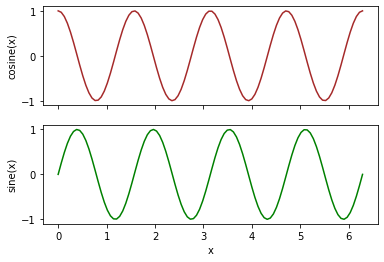

In [195]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.cos(4 * x)
y2 = np.sin(4 * x)

# Plot the data to check
fig, axes = plt.subplots(2, 1, sharex=True)  # Create two subplots, plt.subplots returns a Figure object and a list with the axes

axes[0].plot(x, y1, color="brown")
axes[1].plot(x, y2, color="green")

# Note the difference in how we set the Figure elements
axes[0].set_ylabel("cosine(x)")
axes[1].set_ylabel("sine(x)")
axes[1].set_xlabel("x")

## Exercise 2: Calculate and Plot an exponential function 
In this exercise we will make a plot of the growth of bacteria over time. We assume that the growth occurs exponentially with the formula 

$$g(t) = b + \text{e}^{at}$$ 

where $b$ is the initial number of bacteria, $a$ a parameter and $t$ the time. Perform the following tasks:

- define variables for $b1=1$, $b2=10$, and $a=0.5$
- define an array named t for time from 0 to 100 days with a timestep of 1 day
- Calculate the growth $g(t)$ of the bacteria for both initial conditions ($b1$ and $b2$)
- Plot the growth over time for both (two lines)

In [196]:
# Type your code here

[Answer](#Exercise-2)

# 2D Numpy Arrays
So far we have considered 1-dimensional data, a single row (or column) with data values. It is not uncommon however in geosciences to deal with multidimensional data (e.g., 2D, 3D etcetera). As geoscientists we are used to think in multiple dimension, both spatially and as changes through time. For example we make can a 2D map of the land use of an area, a 3D image of the existence of different types of sediments that can change in the xy plane and with depth. A fourth dimension could for example be "time" and is very common in climate data. 

Numpy arrays can in principal be any N-dimensional shape. The first argument of the methods to create arrays determines the shape of the array. Let us look at some practical examples. 

In [197]:
# Here we create a 2D array
row = 2
col = 2
np.ones((row, col))  # Note how a Tuple is used here!

array([[1., 1.],
       [1., 1.]])

In [198]:
# Here we create a 3D array
np.zeros((2,2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

You can probably see the pattern now. The methods used to create an array (e.g., `np.ones`) can take a Tuple that defines the dimensions of the array that is being created. The length of that Tuple equals the number of dimensions (e.g., np.ones((1, 1, 1, 1)) is a 4D array. In this course we will only use 1D and 2D arrays, but the principles when dealing with higher dimensional arrays are the same.

For 2D arrays we will use the following notation to describe the shape, N x M where N is the number of rows and M the number of columns. We will also refer to higher dimensional arrays as Matrices (or 1 matrix). To find the shape of a given matrix you can use the following syntax:

In [199]:
c = np.ones((5,6))
c.shape

(5, 6)

## Exercise 3: Create a 3x4 array with value 10
Create an array of shape 3 x 4 where all values are 10.0 and print the result

In [200]:
# Type your answer here

[Answer](#Exercise-3)

# Slicing and Indexing
In the previous lecture we saw how we could access values in a list using brackets (e.g., `a[0:10]`). Indexing Numpy arrays works very similar and follows the same pattern: `some_array[start:stop:step]`.

In [201]:
numbers = np.arange(0,11)

print("The length of the list numbers is:", len(numbers))
print("The first item in the numbers list is: ", numbers[0])

The length of the list numbers is: 11
The first item in the numbers list is:  0


In [202]:
# Select the first three values in the list
numbers[0:3]

array([0, 1, 2])

In [203]:
# Select the last item in the list
numbers[-1]

10

The above statements show different ways to select data. The statement `numbers[0:3]` tells Python to select the items 0 to 3 (but not including 3). The statement `number[-1]` will return the last item of the array. The basic pattern to access a single value or a slice of the data is: `numbers[first:last:step]`. Can you figure out what the next code-block returns without running it?

In [204]:
# numbers[-1:2:-1]

if you have a N-dimensional array, you can use multiple indices separated by a comma. Consider the example below

In [205]:
# We create a 2x2 array with values 1 to 4
ab = np.array([[1,2],[3,4]])
print(ab)

[[1 2]
 [3 4]]


In [206]:
# Select the first row, and all columns (: is used to select all columns)
ab[0, :]

array([1, 2])

In [207]:
# Select the firat column
ab[:, 0]

array([1, 3])

# Changing values in an array and plotting the result
Now that we know how to access certain data, we can for example change the values in an array. We do this by selecting a certain value in an array, and setting this with another value. For example:

In [208]:
xy = np.ones((2,2))
# print(xy)
xy[0, 1] = 10
# print(xy)

Above we changed the bottom right value of a 2x2 matrix to the value 10. We can use print statements to check the result, but this strategy becomes difficult as the size of our matrices increases. Plottig your data is a powerfull method to test if what you have done agrees with your expectations.

To plot 2D data, matplotlib has a number of functions, for example `plt.imshow`, `plt.matshow` and `plt.pcolormesh`. Here we will use pcolormesh to plot the 2D-array defined earlier. 

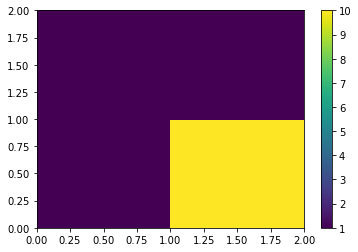

In [209]:
plt.pcolormesh(xy)
plt.colorbar()

## A river in the desert
Let's draw a river flowing through a desert. The river start at the top left corner and from the middle flows to the east and finally south again. We use the `cmap` (short for colormap) to give the plot a nice color. You can find all Matplotlib colormaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

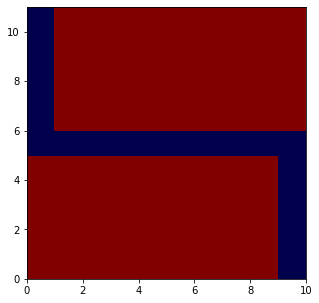

In [210]:
xy = np.ones((11,10))
xy[-1:5:-1, 0] = 0.0  # North to south
xy[5, :] = 0.0  # To the east
xy[0:5, -1] = 0.0

# Make a plot
plt.figure(figsize=(5,5))  # Define a figure first and set the size
plt.pcolormesh(xy, cmap="seismic")

## Exercise 4: Create a mountain
In this exercise we will try and create a mountain. 

- Create a 10x10 matrix with zeros
- Try to create a square mountain with different height levels
- Add a colorbar, xlabel, ylabel and title

In [211]:
# Type your answer here

[Answer](#Exercise-4)

# Additional Readings
Below a list of recommended additional readings on specific topics:
- More explanation on Numpy: https://numpy.org/devdocs/user/absolute_beginners.html
- More Numpy Math functions: https://numpy.org/doc/1.18/reference/routines.math.html



# Answers to exercises

### Exercise 1

In [212]:
# 1. from a python list
a = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# 2. np.linspace
b = np.linspace(0., 1, 6)

# 3. np.arange()
c = np.arange(0, 1.2, 0.2)

# 4. np.arange() method 2
d = np.arange(0, 12, 2) / 10

# 5. python range and list
e = np.array(list(range(6))) / 5

print(a, "\n", b, "\n", c, "\n", d, "\n", e)

[0.  0.2 0.4 0.6 0.8 1. ] 
 [0.  0.2 0.4 0.6 0.8 1. ] 
 [0.  0.2 0.4 0.6 0.8 1. ] 
 [0.  0.2 0.4 0.6 0.8 1. ] 
 [0.  0.2 0.4 0.6 0.8 1. ]


### Exercise 2

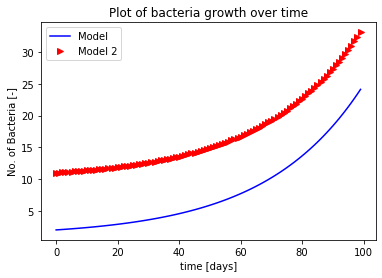

In [213]:
# Set all variables
t = np.arange(0, 100, 1)
a = 0.5
b1 = 1.0
b2 = 10

# Calculate the growth
g1 = b1 + np.exp(a * x)
g2 = b2 + np.exp(a * x)

# Plot x against y
plt.plot(t, g1, color="blue")
plt.plot(t, g2, marker='>', color="r", linestyle=" ")

plt.xlabel("time [days]")
plt.ylabel('No. of Bacteria [-]')
plt.legend(["Model", "Model 2"])
plt.title("Plot of bacteria growth over time");
plt.savefig("figure.png")

## Exercise 3

In [214]:
a = np.full((3,4), 10.0)
print(a)

[[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]]


# Exercise 4

Text(0.5, 1.0, 'Mountain')

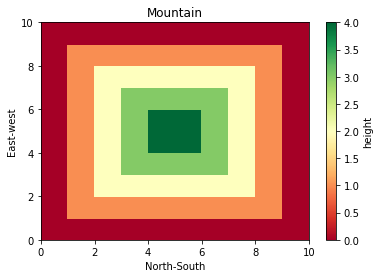

In [215]:
h = np.zeros((10,10))

h[1:9, 1:9] = 1
h[2:8, 2:8] = 2
h[3:7, 3:7] = 3
h[4:6, 4:6] = 4

plt.pcolormesh(h, cmap="RdYlGn")
plt.colorbar(label="height")
plt.ylabel("East-west")
plt.xlabel("North-South")
plt.title("Mountain")